In [1]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#Preparation des données

In [3]:
Data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
Target = [(i+5)/100 for i in range(100)]

In [4]:
#On convertit notre suite de nombre dans une array
data = np.array(Data, dtype=float);
#On convertit notre cible dans une array
target = np.array(Target, dtype=float)

In [5]:
data.shape

(100, 5, 1)

In [6]:
target.shape

(100,)

In [7]:
#definition des variables
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=4)

In [8]:
#Modèle du RNN
model=Sequential()

In [9]:
#D'après le sequential Model "model.add(layers.Dense(2, activation="relu"))"
#Le batch_input shape est défini par (Nombre d'input/None si inconnu,longueur de la séquence,longueur du vecteur)
#On utilise deux LST, l'une qui renvoie une séquence de nombre et une qui renvoit uniquement la dernière valeu
model.add(LSTM((1),batch_input_shape=(None,None,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))

In [10]:
#Configure notre modele pour le training
#On définit la loss comme l erreur absolue moyenne
#On utilise l'algorithme d'Adam qui est une extension à la descente des gradients pour ces raisons là : 
#1)Straightforward to implement.
#2)Computationally efficient.
#3)Little memory requirements.
#4)Invariant to diagonal rescale of the gradients.
#5)Well suited for problems that are large in terms of data and/or parameters.
#6)Appropriate for non-stationary objectives.
#7)Appropriate for problems with very noisy/or sparse gradients.
#8)Hyper-parameters have intuitive interpretation and typically require little tuning.
#lien de l'explication ici : https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
#On définit ensuite le champs d'analyse sur la précision
model.compile(loss='mean_absolute_error',optimizer="adam",metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 1)           12        
_________________________________________________________________
lstm_2 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Train le modèle pendant un nombre fixe d'epochs et détermine les données utilisées pour valider la loss comme x_test et y_test
history = model.fit(x_train,y_train,epochs=400,validation_data=(x_test,y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/400
80/80 [==============================] - 1s 8ms/step - loss: 0.6457 - accuracy: 0.0000e+00 - val_loss: 0.5195 - val_accuracy: 0.0000e+00
Epoch 2/400
80/80 [==============================] - 0s 299us/step - loss: 0.6419 - accuracy: 0.0000e+00 - val_loss: 0.5160 - val_accuracy: 0.0000e+00
Epoch 3/400
80/80 [==============================] - 0s 274us/step - loss: 0.6382 - accuracy: 0.0000e+00 - val_loss: 0.5126 - val_accuracy: 0.0000e+00
Epoch 4/400
80/80 [==============================] - 0s 299us/step - loss: 0.6346 - accuracy: 0.0000e+00 - val_loss: 0.5092 - val_accuracy: 0.0000e+00
Epoch 5/400
80/80 [==============================] - 0s 324us/step - loss: 0.6310 - accuracy: 0.0000e+00 - val_loss: 0.5059 - val_accuracy: 0.0000e+00
Epoch 6/400
80/80 [==============================] - 0s 274us/step - loss: 0.6275 - accuracy: 0.0000e+00 - val_loss: 0.5027 - val_accuracy: 0.0000e+00
Epoch 7/400
80/80 [==============================] -

In [13]:
#On crée une output prediction de l'input pour la comparer à notre résultat
results = model.predict(x_test)

<function matplotlib.pyplot.show(*args, **kw)>

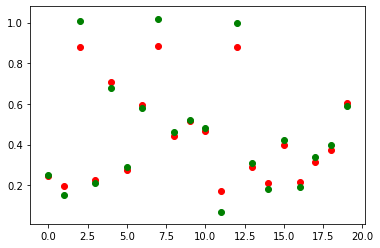

In [14]:
#On compare dans un graphe la différence entre notre prediction 
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show

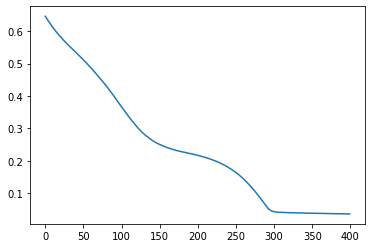

In [15]:
#On affiche l'évolution de la loss
plt.plot(history.history['loss'])
plt.show()